# Fit metallicity gradient demo


Add bla bla about demo data and paper

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

%matplotlib notebook
import matplotlib.pylab as plt
from obs_and_model import Observation,Model,Metallicity_Gradient

## Observations

Let's start by loading our observations (i.e. data), in this case, a metallicity map of a galaxy at z=0.611 observed with MUSE.

We'll use a *Observation* class to do this

In [2]:
obs = Observation(z=0.611,
                  data_path='Demo_data/AS1063_map_metallicity.fits',
                  unc_path='Demo_data/AS1063_map_metallicity_unc.fits',
                  seeing = 1.03/0.2)

In [3]:
obs.info()

Data: Demo_data/AS1063_map_metallicity.fits
Redshift: 0.611
Seeing (in pixels): 5.15
Uncertainty: Demo_data/AS1063_map_metallicity_unc.fits


<IPython.core.display.Javascript object>


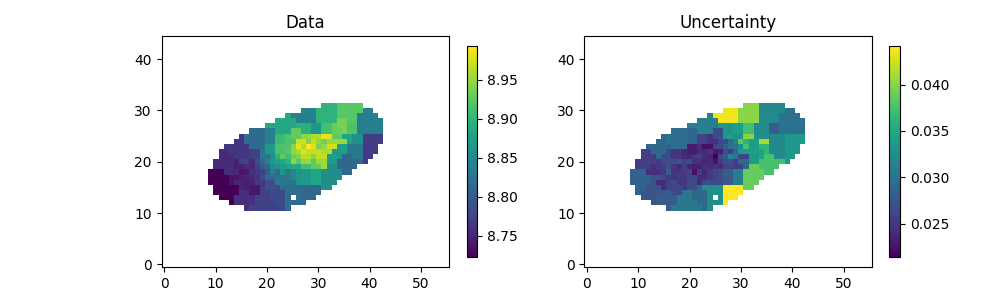

In [4]:
obs.plot()

Now let's choose a model, in this case a metallicity gradient.

Since this is a lensed model, we need to include the lensing information:
    
        - the general displacement maps in x and y (EXPLAIN THIS BETTER)
        - the redshift of the lens

In [5]:
model = Metallicity_Gradient(zlens=0.322,
              dplx_path='Demo_data/AS1063_dplx.fits',
              dply_path='Demo_data/AS1063_dply.fits')
              #dplx_path='Demo_data/AS1063_no_lensing_dpl.fits',
              #dply_path='Demo_data/AS1063_no_lensing_dpl.fits')

In [6]:
model.lensing_info()

Lens redshift: 0.3220
Displacement map (x): Demo_data/AS1063_dplx.fits
Displacement map (y): Demo_data/AS1063_dply.fits


We can also check what are the model parameters

In [7]:
model_parameters = model.model_parameters(verbose=True)
print(model_parameters)

cx: x position of the centre (in pixels)
cy: y position of the centre (in pixels)
q: axis ratio (a/b)
pa: position angle (in degrees)
z_grad : gradient in dex/kpc
z_0: central metallicity
['cx', 'cy', 'q', 'pa', 'z_grad', 'z_0']


All models (gradients but also velocity) are based on a distance map that is calculated in source plane and lensed to
image plane using the displacement maps.

However, the displacement maps given in dplx_path and dply_path, are the global displacement maps (i.e not calculated for a particular source redshift or position) and they need to be tweaked before a distance map for the source we are analysing can be produced.

If we try to create a distance map at this point, an error message will appear:

In [8]:
model.make_distance_map()

No displacement maps for a particular redshift were found.
It is not possible to create a distance map without them.
Use the "create_displacement_maps_for_object" method first.


Using the 'make_displacement_maps_for_object' for our observations (passing the observation object we created into this method), we fix this problem, by producing displacement maps at the correct redshift and aligned with our data, ready to be used.

In [9]:
model.create_displacement_maps_for_object(obs,correct_z=False)

If we now try again to obtain a distance map, it should work

<IPython.core.display.Javascript object>


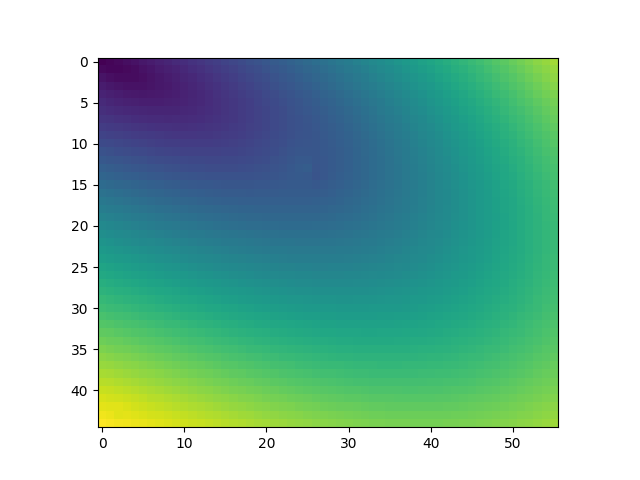

In [10]:
dist = model.make_distance_map()
plt.figure()
plt.imshow(dist)

We can also produce the actual model we are interested in (most of the times we won't need the distance map, this is just an intermediate step common to all models)

<IPython.core.display.Javascript object>


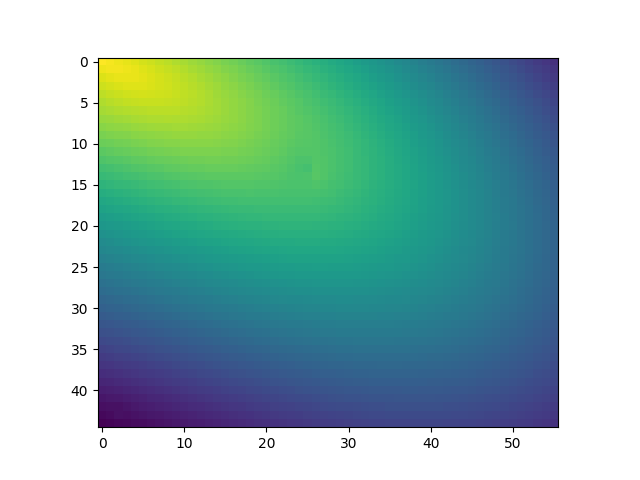

In [11]:
dummy_gradient = model.make_model()

plt.figure()
plt.imshow(dummy_gradient)

Our dummy gradient is indeed a bit dummy, since the initial parameters are not very sensible.

In [12]:
model.print_parameter_values()

cx: 0
cy: 0
q: 1.00
pa: 0.00
z_grad: -1.00
z_0: 0.00


We can update the parameters and get something nicer:

<IPython.core.display.Javascript object>


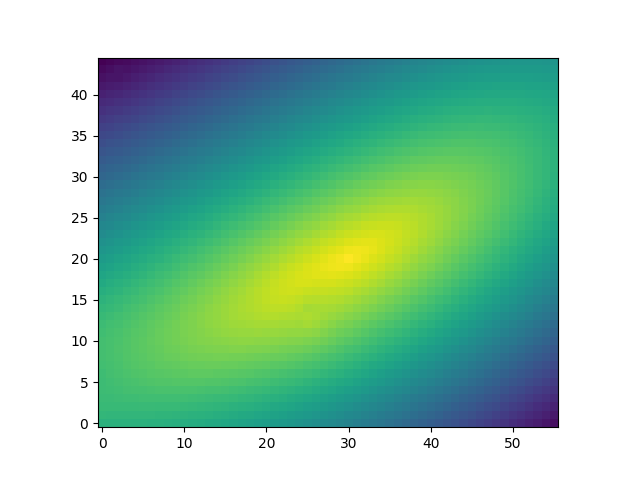

In [13]:
model.cx = 30
model.cy = 20
model.q = 0.8
model.pa = -20
model.z_grad = -0.2
model.z_0 = 8.5

more_sensible_model = model.make_model()

plt.figure()
plt.imshow(more_sensible_model,origin='lower')

The data is now also available in model.data and it can be directly showed with model.plot()

<IPython.core.display.Javascript object>


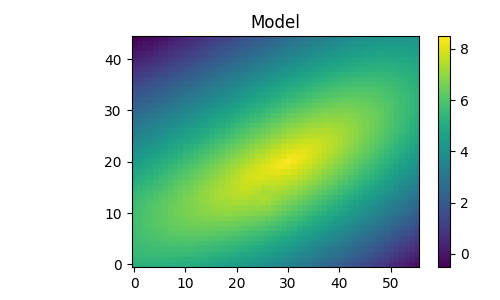

In [14]:
model.data
model.plot()

## Fitting

We use emcee to fit a model to data...

BLA BLA
assume uniform priors

We need both the model and the observation objects we made before, but we also have to build a dictionary that will containt the names of the parameters that are going to be fitted, and their upper and lower bounds.


In [15]:
from fit_model import fit_model,make_input_parameters

The make_input_parameter is just a slightly more handy way to make the dictionary we need, but as long as you input something with this shape:

    {parameter_name1:{'value':X, 'min':Y, 'max':Z},
     parameter_name2:{'value':A, 'min':B, 'max':C},
     ...
     }
     
it should work

In [16]:
# We can access the all the possible parameter names to put in 'name' with:
#parameter_names = model.model_parameters()
input_par = make_input_parameters(name    = ('cx', 'cy',  'q', 'pa', 'z_grad', 'z_0'),
                                 value   = (  29,   23,  0.7,   20,    -0.02, 9.0),
                                 minimum = (  28,   22,  0.4,  -20,     -0.1, 8.5),
                                 maximum = (  33,   27,  0.9,   90,      0.0, 9.5))

print(input_par)

{'q': {'max': 0.9, 'value': 0.7, 'min': 0.4}, 'z_grad': {'max': 0.0, 'value': -0.02, 'min': -0.1}, 'cy': {'max': 27, 'value': 23, 'min': 22}, 'pa': {'max': 90, 'value': 20, 'min': -20}, 'cx': {'max': 33, 'value': 29, 'min': 28}, 'z_0': {'max': 9.5, 'value': 9.0, 'min': 8.5}}


In [17]:
#out = fit_model(obs,model,input_par,'as1063_metallicity',nsteps=2000,nwalkers=24,mask=None,binning_map=None)

## Check fit

In [18]:
from check_fit import Output

In [19]:
results = Output('as1063_metallicity')

<IPython.core.display.Javascript object>


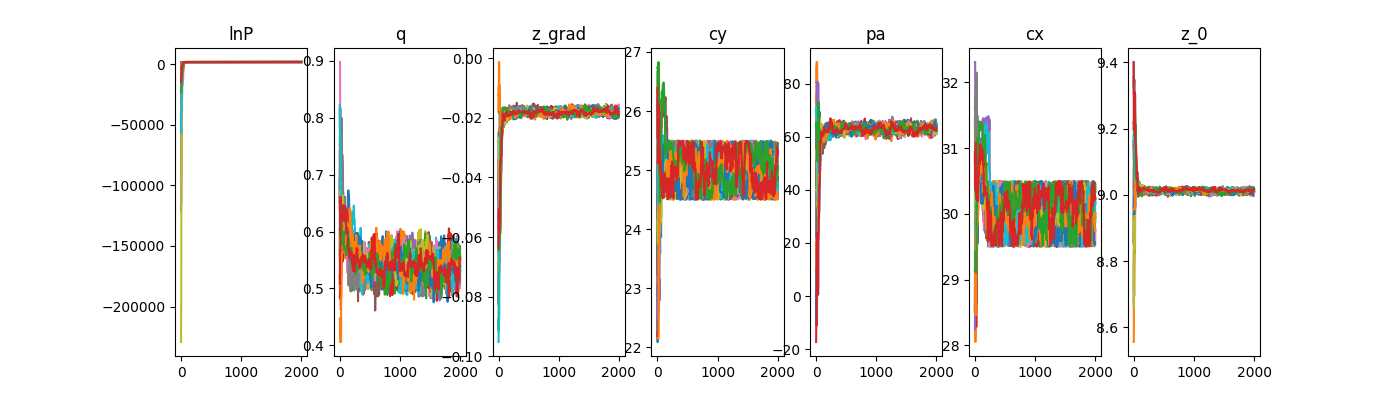

In [20]:
results.check_convergence()

<IPython.core.display.Javascript object>


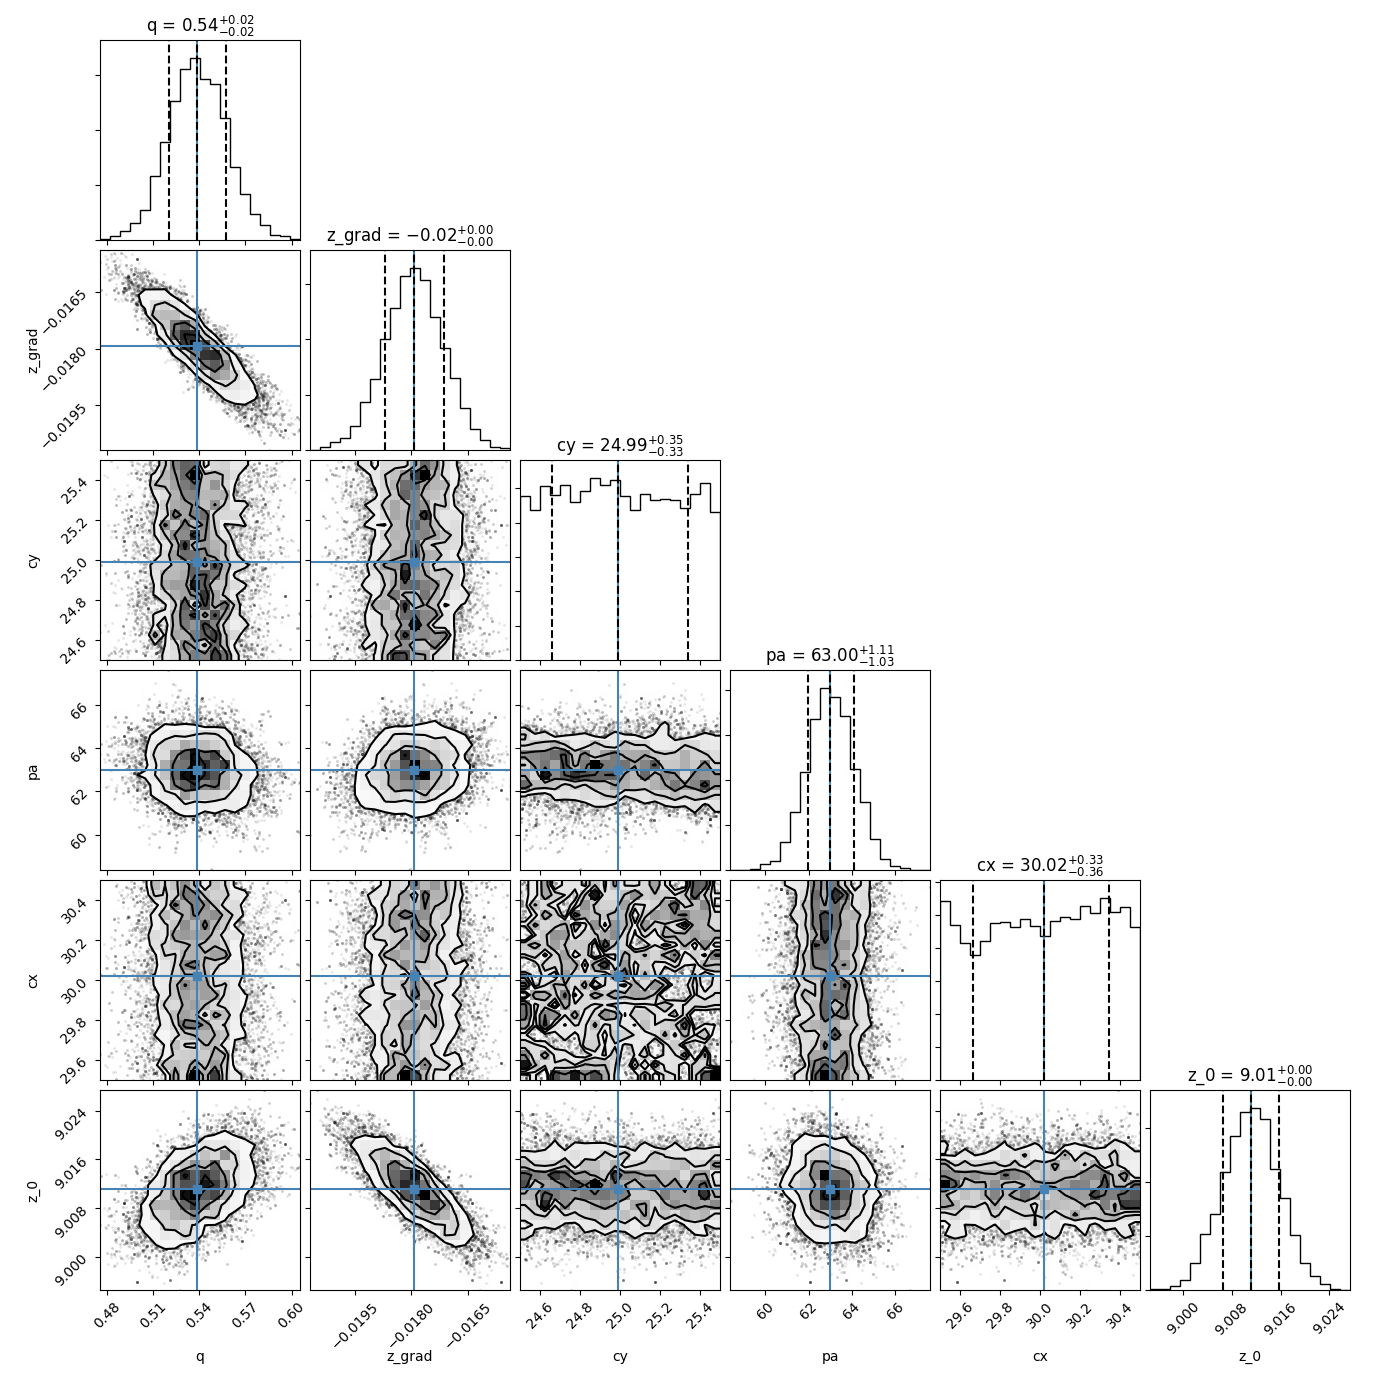

In [21]:
results.make_cornerplot(start=1000)

In [22]:
best_param = results.best_parameters(start=1000)

q 0.5387$^{+0.0185}_{-0.0183}$
z_grad -0.0179$^{+0.0008}_{-0.0008}$
cy 24.9879$^{+0.3522}_{-0.3262}$
pa 63.0049$^{+1.1146}_{-1.0311}$
cx 30.0207$^{+0.3262}_{-0.3567}$
z_0 9.0112$^{+0.0045}_{-0.0046}$


This is just a dictionary with the +/- 1 sigma and mean of the samples (from *start* to the end) for each parameter:

In [23]:
best_param

{'cx': {'max': 0.3567280807964224,
  'min': 0.32619065891430665,
  'value': 30.020739692885776},
 'cy': {'max': 0.32620154305553584,
  'min': 0.35221321361811064,
  'value': 24.987947177391955},
 'pa': {'max': 1.0310619951738076,
  'min': 1.114587123687329,
  'value': 63.00490935630606},
 'q': {'max': 0.018293332042532584,
  'min': 0.01847157920772624,
  'value': 0.5387305367620574},
 'z_0': {'max': 0.004598823551692277,
  'min': 0.004505210757482558,
  'value': 9.011186952405048},
 'z_grad': {'max': 0.000776575759815986,
  'min': 0.0007861494220609694,
  'value': -0.01792989529174308}}

Using this dictiorary, we can produce the 'best' model of this fit.

(Or you can directly modify the model's parameters)

<IPython.core.display.Javascript object>


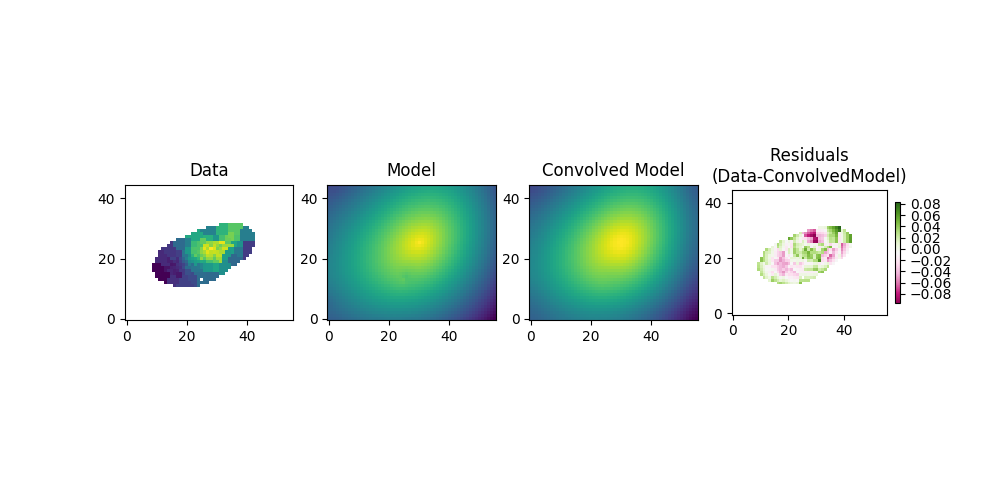

In [24]:
model, residuals = results.plot_solution(best_param)

Some basic goodness of fit metrics can also be calculated:

In [25]:
chi2_dof = results.goodness_of_fit(best_param)

Chi2: 461.01
Chi2/dof: 11.82
Loglikelihood: 1672
BIC: -3321


## Fixing some parameters

It is also possible to fix some parameters. To do this, we set the fixed parameters to their value in the model object and then construct an input parameter dictionary without these fixed parameters.

In [26]:
# First we set the parameters to the values we do not want to vary:
model.cx = 28
model.cy = 22
# Then we cosntruct a dictionary with the remaining parameters
par_fixed_centre = make_input_parameters(name    = ('q', 'pa', 'z_grad', 'z_0'),
                                         value   = (0.7,   20,    -0.02, 9.0),
                                         minimum = (0.4,  -20,     -0.1, 8.5),
                                         maximum = (0.9,   90,      0.0, 9.5))

print(par_fixed_centre)

{'q': {'max': 0.9, 'value': 0.7, 'min': 0.4}, 'z_grad': {'max': 0.0, 'value': -0.02, 'min': -0.1}, 'pa': {'max': 90, 'value': 20, 'min': -20}, 'z_0': {'max': 9.5, 'value': 9.0, 'min': 8.5}}


In [27]:
#out2 = fit_model(obs,model,par_fixed_centre,'as1063_metallicity_fixed_centre',nsteps=2000,nwalkers=24,mask=None,binning_map=None)

In [28]:
res_fixed_centre = Output('as1063_metallicity_fixed_centre')

<IPython.core.display.Javascript object>


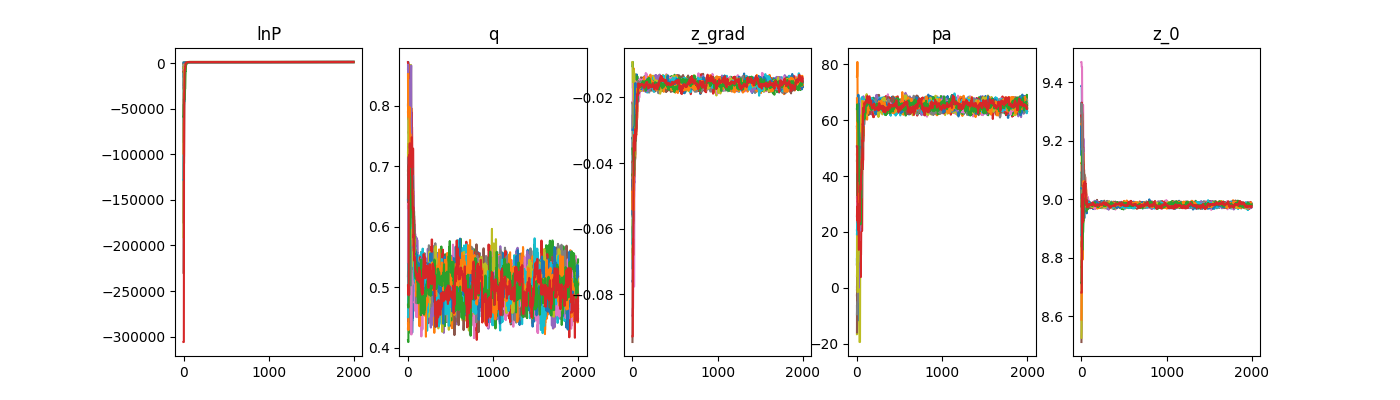

<IPython.core.display.Javascript object>


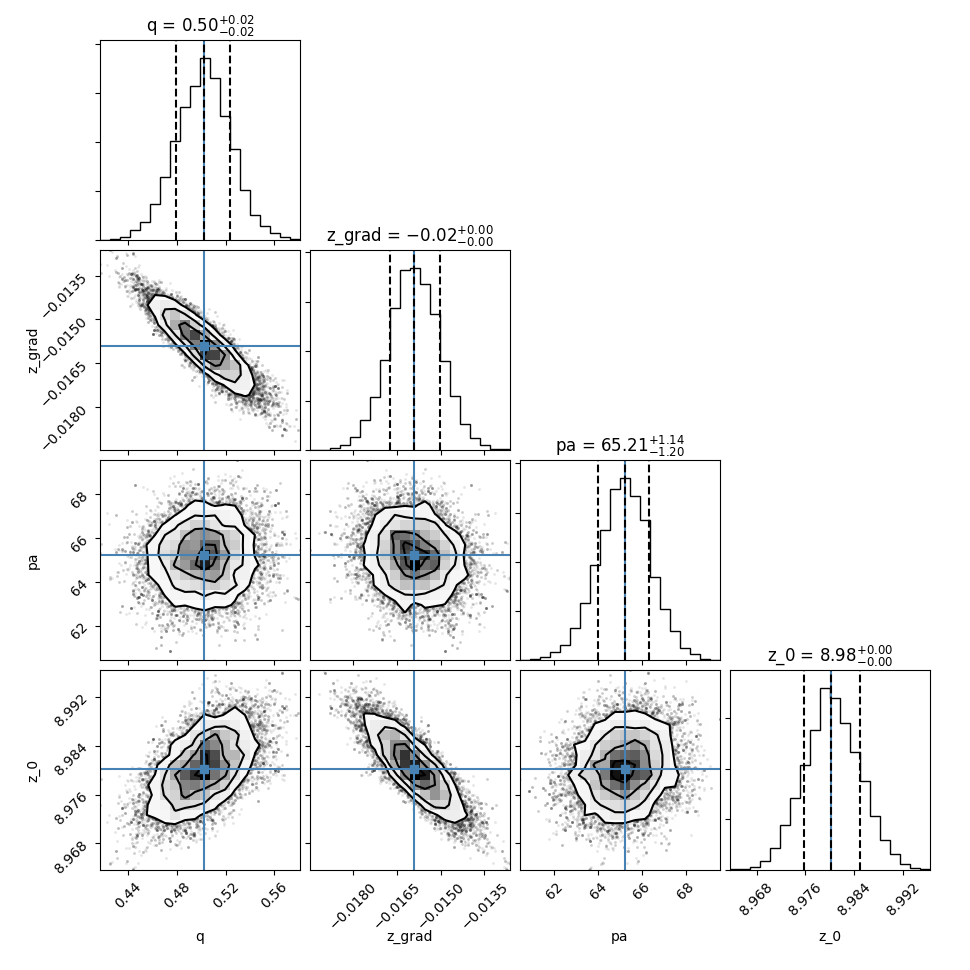

In [29]:
res_fixed_centre.check_convergence()
res_fixed_centre.make_cornerplot(start=1000)

## Take the data binning into account

!This is not a function to bin the data! 

But if the data was binned in order to derive the image being fitted (i.e. if several pixels were grouped and analyised as one data point) it is possible to take that into account, passing a 'binning_map' into the fitting function.

This binning maps should have the same size as the data, and each bin should have a different (and unique) value. **Pixels not used should be assigned a(ny) negative number**. This also indirectly acts as a mask, since pixels without an assigned bin number will not be included when calculating the log-likelihood.


The data used in this demo was binned using the Voronoi binning code from  Cappellari & Copin (2003, MNRAS, 342, 345) available here: http://www-astro.physics.ox.ac.uk/~mxc/software/.

<IPython.core.display.Javascript object>


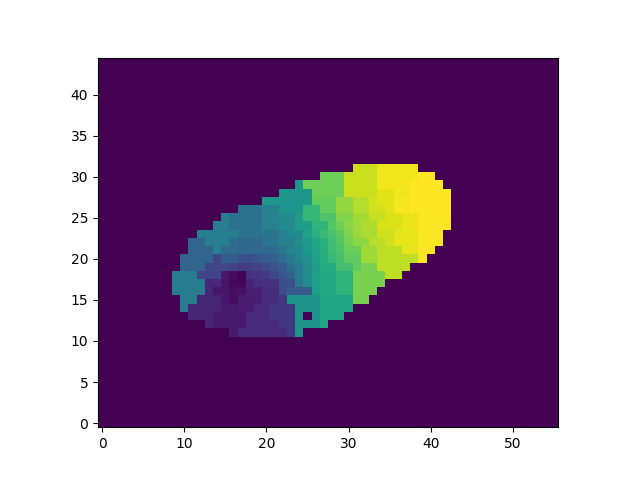

In [30]:
from astropy.io import fits

voronoi_map = fits.getdata('Demo_data/AS1063_binning_map.fits')
plt.figure()
plt.imshow(voronoi_map,origin='lower')

And now we can fit the data including this binning. This means that the maximisation of the log-likelihood function will be done over the bins and not over the pixels. This is **quite slower** than the fitting without the binning

In [31]:
#out3 = fit_model(obs,model,input_par,'as1063_metallicity_binned',nsteps=2000,nwalkers=24,mask=None,binning_map='Demo_data/AS1063_binning_map.fits')

In [32]:
res_binned = Output('as1063_metallicity_binned')

<IPython.core.display.Javascript object>


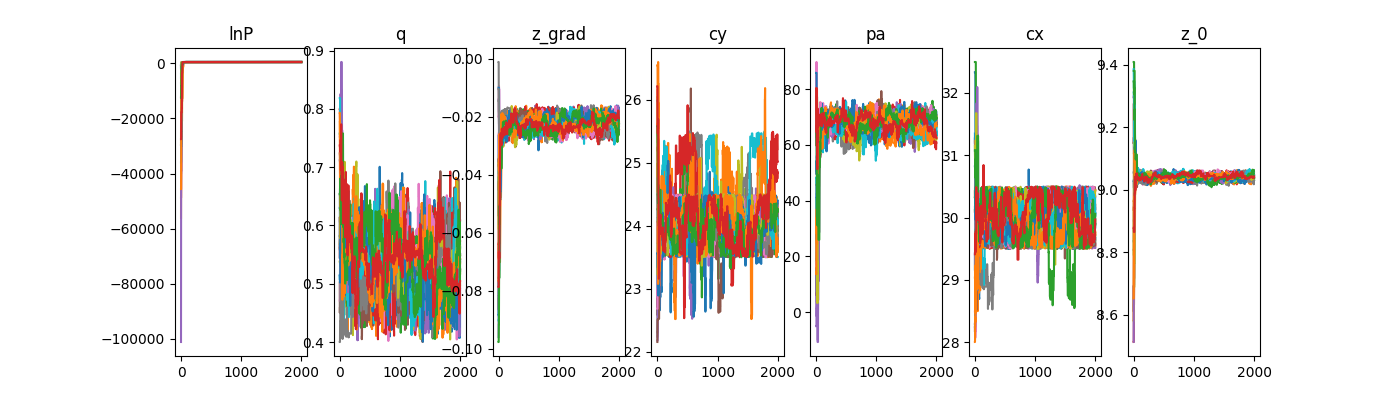

<IPython.core.display.Javascript object>


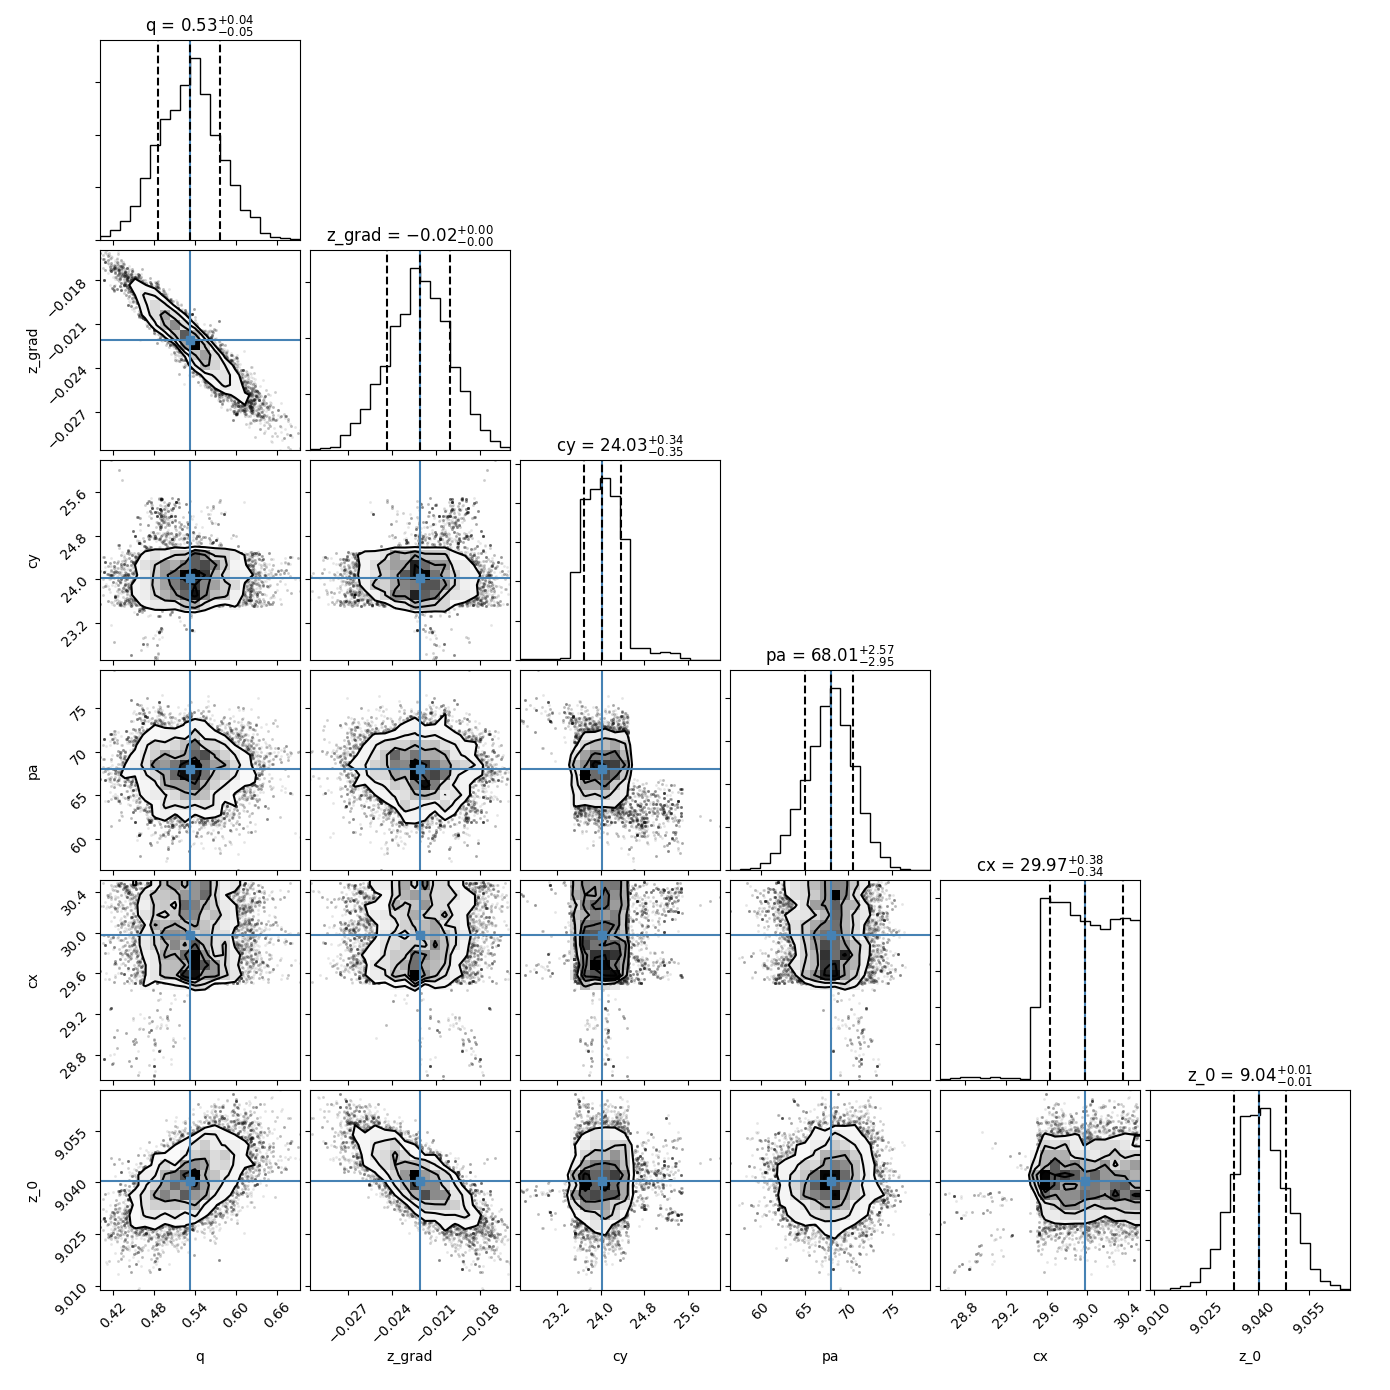

In [33]:
res_binned.check_convergence()
res_binned.make_cornerplot(start=1000)

## Masking parts of the data

Another option is to mask parts of the data. This can be done my providing a mask image. This should contain only ones (valid pixels) or zeros (masked pixels). Although mask and binning can be used at the same time, they can be are redundant (pixels with negative values in the binning image are effectivelly masked).

<IPython.core.display.Javascript object>


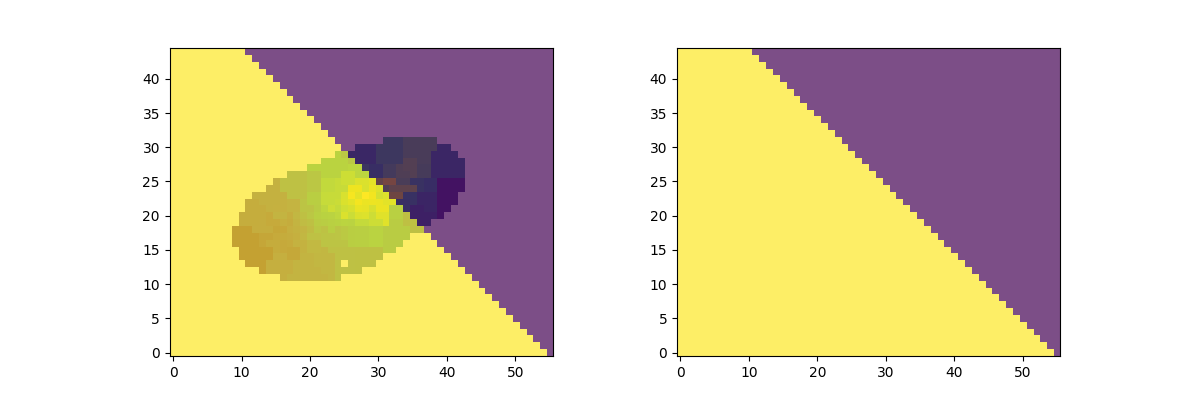

In [34]:
import numpy as np

mask = np.ones_like(obs.data)

x, y = np.meshgrid(range(obs.data.shape[0]),range(obs.data.shape[1]))
mask = x < 55 - 1*y
mask = mask.T

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(obs.data,origin='lower')
ax[0].imshow(mask,origin='lower',alpha=0.7)
ax[1].imshow(mask,origin='lower',alpha=0.7)

<IPython.core.display.Javascript object>


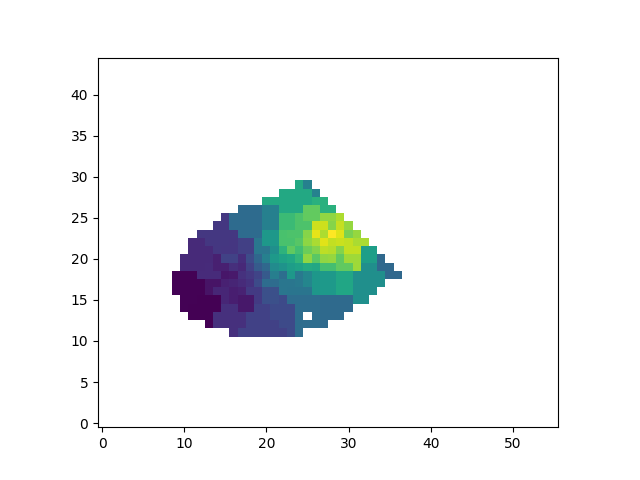

Using 24 walkers and fitting ['q', 'z_grad', 'cy', 'pa', 'cx', 'z_0']:
MCMCing for 2000 steps
0 %
10 %
20 %
40 %
80 %
Execution time: 2.2792 minutes


In [35]:
out4 = fit_model(obs,model,input_par,'as1063_metallicity_masked',nsteps=2000,nwalkers=24,mask=mask,binning_map=None)

And we do as usual

In [41]:
res_masked = Output('as1063_metallicity_masked')

<IPython.core.display.Javascript object>


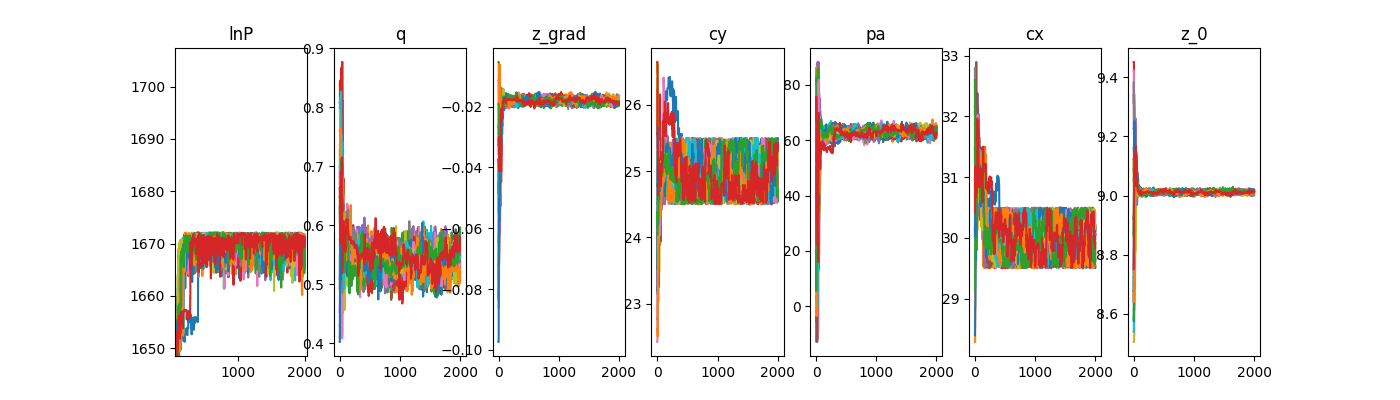

<IPython.core.display.Javascript object>


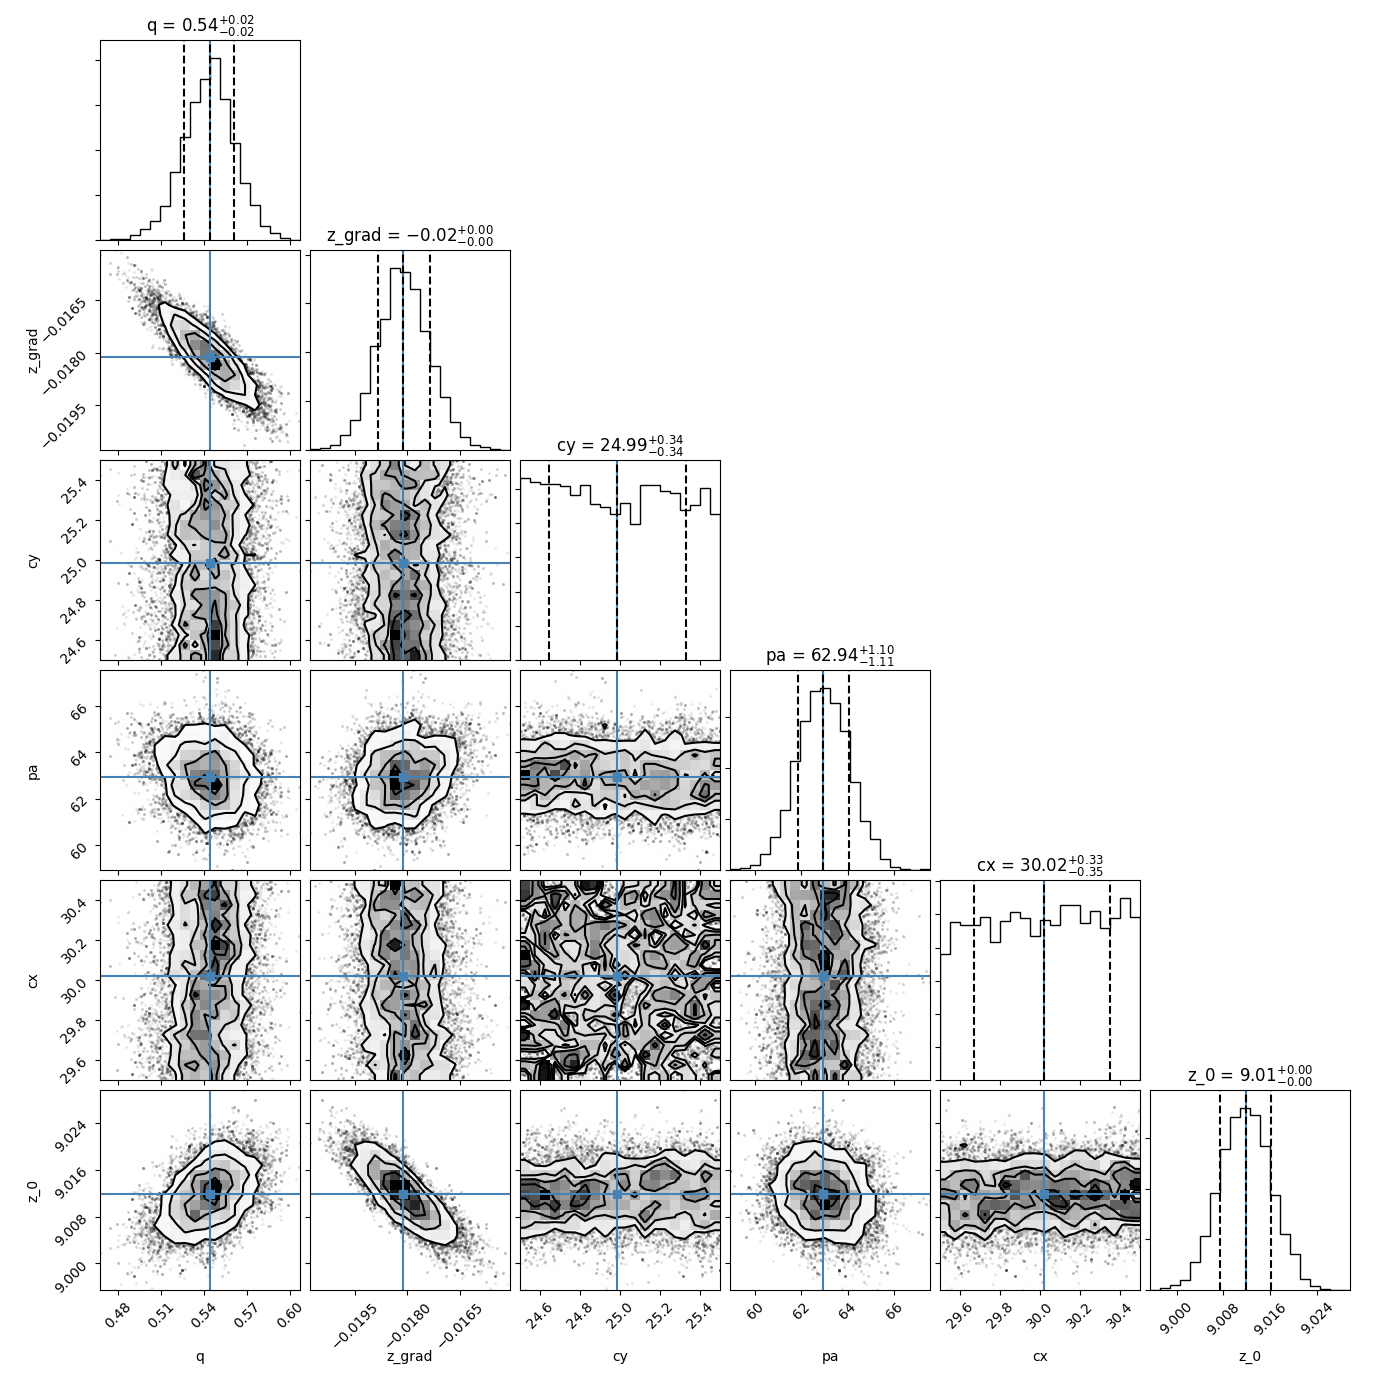

In [42]:
res_masked.check_convergence()
res_masked.make_cornerplot(start=1000)